In the interest of being EEOC compliant, I removed a few features from my other model.  However, I wanted to see how these features (age, gender, marital status, previous employers) could affect my model, so I incorporated them in this separate notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
hrdf = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
raw_hrdf = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hrdf = hrdf.drop(columns=['MonthlyRate','DailyRate','HourlyRate','Over18',
                          'StandardHours','EmployeeCount','EmployeeNumber'])

hrdf.BusinessTravel[hrdf.BusinessTravel == 'Non-Travel'] = 0
hrdf.BusinessTravel[hrdf.BusinessTravel == 'Travel_Rarely'] = 1
hrdf.BusinessTravel[hrdf.BusinessTravel == 'Travel_Frequently'] = 2

hrdf.Gender[hrdf.Gender == 'Male'] = 1
hrdf.Gender[hrdf.Gender == 'Female'] = 0

hrdf.OverTime[hrdf.OverTime == 'Yes'] = 1
hrdf.OverTime[hrdf.OverTime == 'No'] = 0

hrdf.Attrition[hrdf.Attrition == 'Yes'] = 1
hrdf.Attrition[hrdf.Attrition == 'No'] = 0

hrdf = hrdf.astype({'Attrition': 'int64','BusinessTravel':'int64','OverTime':'int64'})
hrdf = pd.get_dummies(hrdf,columns=['Department','EducationField','JobRole','MaritalStatus'])

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users

In [3]:
hrdf

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1,2,2,0,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,8,1,3,1,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,2,2,4,1,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,3,4,4,0,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,2,1,1,1,3,1,2,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,2,3,1,4,2,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,6,1,4,1,2,3,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,4,3,2,1,4,2,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,2,3,4,1,2,2,2,...,0,0,0,0,0,1,0,0,1,0


In [4]:
y = hrdf['Attrition']
X = hrdf.drop(columns='Attrition')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .3,
                                                    shuffle = True,
                                                    random_state=5678,
                                                    stratify=hrdf['Attrition'])

In [6]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score

Using TensorFlow backend.
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [7]:
ros = RandomOverSampler(random_state=5678)
X_resampled_train, y_resampled_train = ros.fit_sample(X_train,y_train)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
X_re_tr_scaled = ss.fit_transform(X_resampled_train)
X_re_te_scaled = ss.transform(X_test)

0.7551020408163265 0.3609022556390977 0.676056338028169


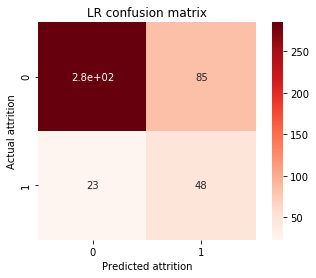

In [10]:
Logistic_Regression = LogisticRegression(solver='liblinear')
Logistic_Regression.fit(X_re_tr_scaled,y_resampled_train)
y_pred = Logistic_Regression.predict(X_re_te_scaled)
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test,y_pred))
LRconf = confusion_matrix(y_test, y_pred)
sns.heatmap(LRconf, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('LR confusion matrix');

In [11]:
sorted(list(zip(Logistic_Regression.coef_[0],X.columns)),reverse=True)

[(1.0773028362342036, 'OverTime'),
 (0.7698439749861079, 'YearsAtCompany'),
 (0.614826049207962, 'BusinessTravel'),
 (0.5969416773627744, 'JobRole_Sales Representative'),
 (0.5750904761991656, 'YearsSinceLastPromotion'),
 (0.5659855409712328, 'JobRole_Human Resources'),
 (0.44227882022003173, 'NumCompaniesWorked'),
 (0.38303524122018723, 'DistanceFromHome'),
 (0.3085737626558094, 'MaritalStatus_Single'),
 (0.2648249671380807, 'Department_Research & Development'),
 (0.2200566886917844, 'EducationField_Technical Degree'),
 (0.21960218776332868, 'JobRole_Sales Executive'),
 (0.19303324062157845, 'EducationField_Human Resources'),
 (0.18135129758056429, 'Gender'),
 (0.07986889076919494, 'JobRole_Laboratory Technician'),
 (0.07275382487326551, 'JobLevel'),
 (0.04517374140433958, 'Education'),
 (0.04429906452801746, 'EducationField_Marketing'),
 (-0.004048483825057326, 'EducationField_Other'),
 (-0.04462063113928403, 'Department_Sales'),
 (-0.04715237210466294, 'PerformanceRating'),
 (-0.053

In [12]:
raw_hrdf.OverTime[raw_hrdf.OverTime == 'Yes'] = 1
raw_hrdf.OverTime[raw_hrdf.OverTime == 'No'] = 0

raw_hrdf.Attrition[raw_hrdf.Attrition == 'Yes'] = 1
raw_hrdf.Attrition[raw_hrdf.Attrition == 'No'] = 0

raw_hrdf = raw_hrdf.astype({'Attrition': 'int64','OverTime':'int64'})

raw_hrdf[['OverTime','Attrition']].groupby('OverTime').mean()

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,Attrition
OverTime,
0,0.104364
1,0.305288


Mostly unsurprising findings.

#### Age
As an employee ages, they are less likely to attrit.
#### Gender
Self-identified men are marginally more likely to attrit than self-identified women.  However, in order of coefficient strength, this feature comes in at 32 of 44.
#### Marital Status
Single employees are more likely to attrit, divorced employees are less likely to attrit, and married employees are marginally less likely to attrit.  However, marital status in any version is superceded by 18 more impactful features.
#### Previous Companies
Less surprising than any of the above, employees with more former employers are more likely to attrit.

In [13]:
sorted(list(zip(abs(Logistic_Regression.coef_[0]),X.columns)),reverse=True)

[(1.0773028362342036, 'OverTime'),
 (0.7698439749861079, 'YearsAtCompany'),
 (0.6919599604824764, 'YearsWithCurrManager'),
 (0.6248024416383907, 'YearsInCurrentRole'),
 (0.614826049207962, 'BusinessTravel'),
 (0.5969416773627744, 'JobRole_Sales Representative'),
 (0.5750904761991656, 'YearsSinceLastPromotion'),
 (0.5672876494279165, 'JobRole_Healthcare Representative'),
 (0.5659855409712328, 'JobRole_Human Resources'),
 (0.5399633938520744, 'Department_Human Resources'),
 (0.5073790565812724, 'JobSatisfaction'),
 (0.4786562021446937, 'JobInvolvement'),
 (0.4613329088311752, 'EnvironmentSatisfaction'),
 (0.44227882022003173, 'NumCompaniesWorked'),
 (0.4252875599984831, 'RelationshipSatisfaction'),
 (0.39943301141650384, 'TrainingTimesLastYear'),
 (0.38303524122018723, 'DistanceFromHome'),
 (0.35984125820879376, 'JobRole_Research Scientist'),
 (0.31917091754281873, 'MaritalStatus_Divorced'),
 (0.3085737626558094, 'MaritalStatus_Single'),
 (0.2935101064078104, 'JobRole_Research Director')

0.7528344671201814 0.3442622950819672 0.5915492957746479


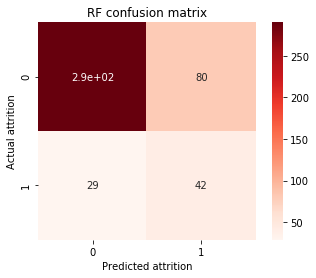

In [14]:
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_re_tr_scaled,y_resampled_train)
y_pred = rf.predict(X_re_te_scaled)
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test,y_pred))
RFconf = confusion_matrix(y_test, y_pred)
sns.heatmap(RFconf, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('RF confusion matrix');

In [15]:
sorted(list(zip(rf.feature_importances_,X.columns)),reverse=True)

[(0.13227449965542254, 'OverTime'),
 (0.12181359504386911, 'MonthlyIncome'),
 (0.09514438721471304, 'StockOptionLevel'),
 (0.08386111251292837, 'Age'),
 (0.0822195640865215, 'JobLevel'),
 (0.0802032136580073, 'TotalWorkingYears'),
 (0.059644431419546215, 'MaritalStatus_Single'),
 (0.04192113617991236, 'YearsAtCompany'),
 (0.04034240906838878, 'YearsInCurrentRole'),
 (0.027925154767229027, 'Department_Sales'),
 (0.02646426280377052, 'YearsWithCurrManager'),
 (0.02563038792664672, 'JobRole_Sales Representative'),
 (0.021460790309349543, 'JobRole_Sales Executive'),
 (0.016097075654608866, 'JobInvolvement'),
 (0.015299537105957274, 'DistanceFromHome'),
 (0.013075117669596865, 'BusinessTravel'),
 (0.01297195258255273, 'JobSatisfaction'),
 (0.012705663904080212, 'Department_Research & Development'),
 (0.01161433066115582, 'NumCompaniesWorked'),
 (0.009772929731536553, 'MaritalStatus_Divorced'),
 (0.008804803929903859, 'JobRole_Healthcare Representative'),
 (0.008063454491376704, 'TrainingTim

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


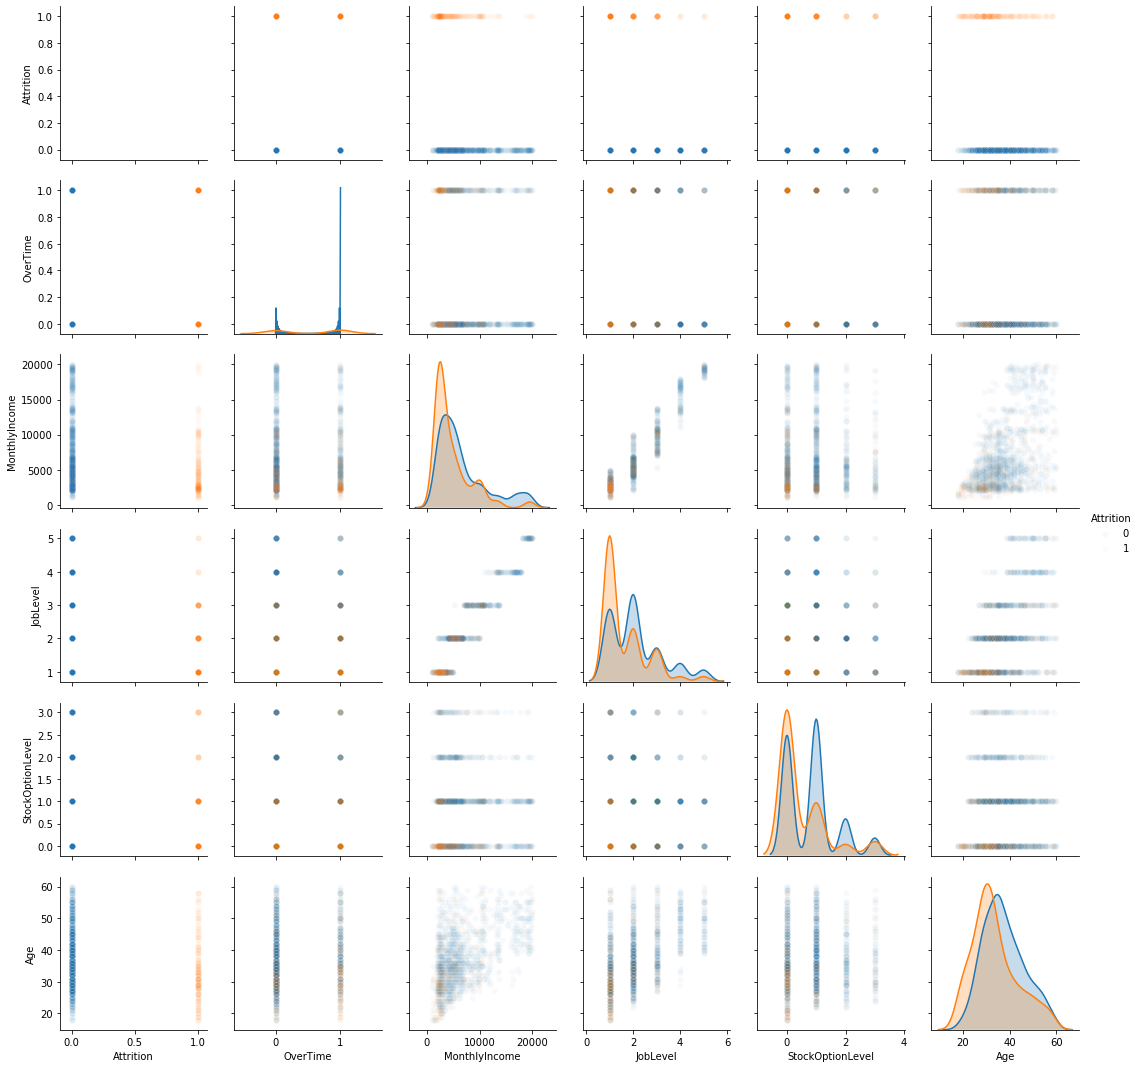

In [16]:
sns.pairplot(hrdf[[
    'Attrition','OverTime','MonthlyIncome','JobLevel','StockOptionLevel','Age'
]],hue='Attrition',plot_kws={'alpha':.03})